In [8]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)



# Logical AND Problem


<IPython.core.display.Latex object>

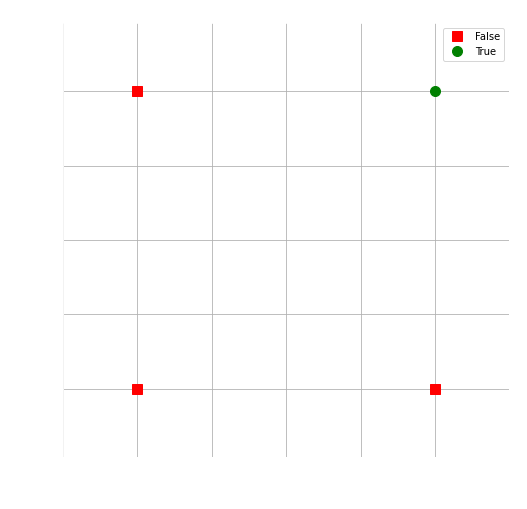

In [163]:
from IPython.display import Latex, HTML, Markdown
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

data = [(np.array([False, False]), False),
        (np.array([True, False]), False),
        (np.array([False, True]), False),
        (np.array([True, True]), True)]


fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

def plot_problem():
    for sample in data:
        sample_input = sample[0].astype(int)
        ground_truth = sample[1]

        if ground_truth: # If output is True
            sample_marker = 'o'
            sample_color = 'green'
        else:
            sample_marker = 's'
            sample_color = 'red'

        plt.plot(sample_input[0],
                sample_input[1],
                sample_marker,
                color=sample_color,
                markersize=10,
                label=ground_truth)
    plt.axis('equal')
    limits = [-.25, 1.25, -.25, 1.25]
   
    plt.grid()
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    handles, labels = ax.get_legend_handles_labels()
    legends = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*legends))
    plt.title('Logical AND')

    ticks = np.arange(limits[0], 2*limits[1], .25)
    tick_labels = [str(tick) for tick in ticks]
    tick_labels[np.where(ticks == 0)[0][0]] += '\n(False)'
    tick_labels[np.where(ticks == 1)[0][0]] += '\n(True)'
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_labels)
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)
    plt.axis(limits)

    label_color = 'white'
    ax.set_title(ax.get_title(), color=label_color)
    
    [ax.spines[spine].set_color(label_color) for spine in ax.spines]
    ax.xaxis.label.set_color(label_color)
    ax.yaxis.label.set_color(label_color)
    ax.tick_params(axis='x', colors=label_color)
    ax.tick_params(axis='y', colors=label_color)


    return legends


plot_problem()

Latex('''
We have the data
\\begin{align}
\\mathbf{x_i} &\in \\left\\{
\\begin{pmatrix} false\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ true\\end{pmatrix}
\\right\\}, \\\ 
&= \\left\\{
\\begin{pmatrix} 0\\\ 0\\end{pmatrix},
\\begin{pmatrix} 1\\\ 0\\end{pmatrix},
\\begin{pmatrix} 0\\\ 1\\end{pmatrix},
\\begin{pmatrix} 1\\\ 1\\end{pmatrix}
\\right\\} \\\ \\\ 
t_i &\in \\left\\{false, false, false, true
\\right\\} \\\ 
&= \\left\\{0, 0, 0, 1\\right\\}.
\\end{align}
where $\\mathbf{x_i}$ is an input sample and $z_i$ is the corresponding output target.
''')


# Solving the problem geometrically

<IPython.core.display.Latex object>

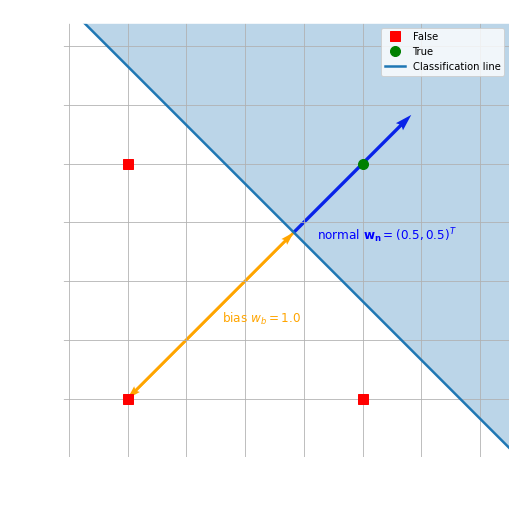

In [192]:

fig = plt.figure(figsize=(8, 8))
ax = fig.gca()


def plot_classification(weights):
    
    normal = np.atleast_2d(weights[:2]).T
    #bias = -weights[-1]/np.linalg.norm(normal)
    bias = weights[-1]
    legends = plot_problem()
    
    bias_vec = bias * normal / np.linalg.norm(normal)
    plt.quiver(bias_vec[0], bias_vec[1], normal[0], normal[1], color='b', angles='xy', scale_units='xy', scale=1)
    plt.text(bias_vec[0]+.1, bias_vec[1]-.03, r"normal $\mathbf{w_{n}} = (%s, %s)^T$"%(np.round(normal[0][0], 2), np.round(normal[1][0], 2)), color='b', fontsize=12)

    plt.quiver(0, 0, bias_vec[0], bias_vec[1], color='orange', angles='xy', scale_units='xy', scale=1, width=.006)
    plt.quiver(bias_vec[0], bias_vec[1], -bias_vec[0], -bias_vec[1], angles='xy', scale_units='xy', scale=1, color='orange', width=.006)
    plt.text(bias_vec[0]/2+.05, bias_vec[1]/2-.03, r"bias $w_b = %s$"%(np.round(bias, 2)), color='orange', fontsize=12)

    # Parameterization
    x_lim = 2*(normal[0]/normal[1] + bias)
    t = np.arange(-x_lim, x_lim, 1)
    line_direction = np.array([normal[1], -normal[0]])
    classification_line = line_direction * t + bias_vec 
    classification_plot = plt.plot(classification_line[0], classification_line[1], linewidth=2.5)
    plt.fill_between(classification_line[0], classification_line[1], np.max(classification_line[1]), alpha=.3,)

    legends.append((classification_plot[0], 'Classification line'))
    plt.legend(*zip(*legends))
    plt.axis([-.25, 1.6, -.25, 1.6])
    
w_b = 1.
normal = np.atleast_2d([.5, .5]).T

# w_3 = -bias*np.linalg.norm(normal)
weights = np.append(normal, w_b)


plot_classification(weights)

Latex('''
To solve the problem geomerically, lets define a classification line with some normal respectively bias
\\begin{align*}
\\mathbf{w_{n}} &= \\begin{pmatrix} %s \\\ %s \\end{pmatrix},\\\ 
w_b &= %d.
\\end{align*}
'''%(normal[0][0], normal[1][0], w_b))

In [48]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
    ["resetEquationNumbers", MathJax.InputJax.TeX],
    ["PreProcess", MathJax.Hub],
    ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

<IPython.core.display.Latex object>

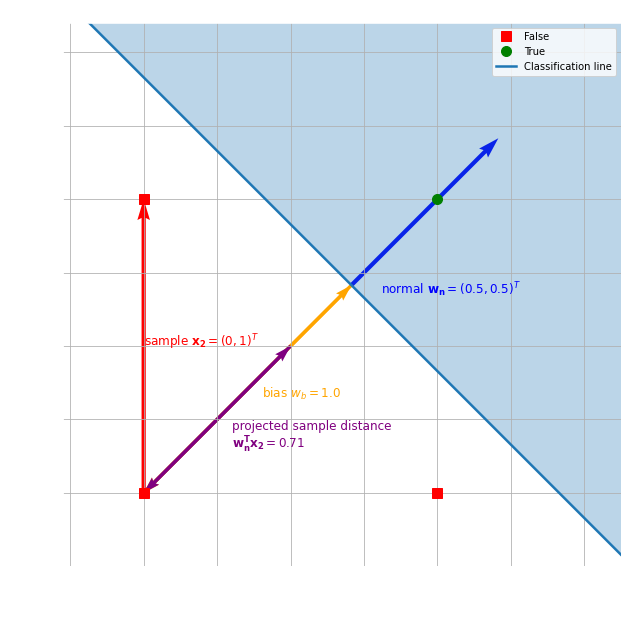

In [207]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()


plot_classification(weights)


sample_index = 2
sample = data[sample_index][0].astype(int)

normalization_factor = 1 / np.linalg.norm(normal)
projected_sample_distance = (normal.T @ sample)[0] * normalization_factor
weighted_sum = projected_sample_distance - bias

plt.quiver(0, 0, sample[0], sample[1], color='r', angles='xy', scale_units='xy', scale=1)
# projected_sample_distance = normal.T @ sample
projected_sample = projected_sample_distance * np.sqrt(2)* normal
plt.text(sample[0]/2, sample[1]/2, r"sample $\mathbf{x_%s} = (%s, %s)^T$"%(sample_index, sample[0], sample[1]), color='red', fontsize=12)

plt.quiver(0, 0, projected_sample[0], projected_sample[1], color='purple', angles='xy', scale_units='xy', scale=1,width=.006)
plt.quiver(projected_sample[0], projected_sample[1], -projected_sample[0], -projected_sample[1], color='purple', angles='xy', scale_units='xy', scale=1, width=.006)
plt.text(projected_sample[0]/2+.05, projected_sample[1]/2-.1, r"projected sample distance"'\n'
"$\mathbf{w_{n}^T} \mathbf{x_2} = %s$"%np.round(projected_sample_distance, 2), color='purple', fontsize=12)


Latex('''
Consider some sample e.g. $\\mathbf{x_2}$ 

Projecting it onto $\\frac{\mathbf{w_{n}}}{||\\mathbf{w_{n}}||}$, and subtracting with the bias $w_b$, gives weighted sum

\\begin{align}
s_2 &= \\frac{1}{||\\mathbf{w_{n}}||}\mathbf{w_{n}^T} \\mathbf{x_2} - w_b \\\ 
&= \\frac{1}{\\sqrt{w_1^2 + w_2^2}} \\begin{pmatrix} w_1 & w_2\\end{pmatrix} \\begin{pmatrix} x_1\\\ x_2\\end{pmatrix} - w_b\\\ 
&= \\underbrace{%s \cdot \\begin{pmatrix} 0.5 & 0.5 \\end{pmatrix} \\begin{pmatrix} 0 \\\ 1 \\end{pmatrix}}_{%s} - 1 \\\ 
&= %s
\\end{align}

that is, the distance to the classification line. Finally, let the prediction

\\begin{equation}
y = a(s) = \\begin{cases} 1, \\text{ if } s \\geq 0,\\\ 0 \\text{ otherwise}
\\end{cases}
\\end{equation}

determine the classification. Sample $\\mathbf{x_2}$ would thus be predicted as
\\begin{equation}
y_2 = a(s_2) = \\left\\{s_2 = %s \\ngeq 0 \\right\\} = 0, 
\\end{equation}
that is $false$, as expected.
'''%tuple(np.round(np.array([normalization_factor, projected_sample_distance, weighted_sum, weighted_sum]), 2))
)


In [208]:
sample_index = 3
sample = data[sample_index][0].astype(int)
projected_sample_distance = (normal.T @ sample)[0] * normalization_factor
weighted_sum = projected_sample_distance - bias

Latex('''
Lets instead classify sample $\\mathbf{x_3} = \\begin{pmatrix} 1\\\ 1\\end{pmatrix}.$
The weighted sum

\\begin{align}
s_3 &= \\frac{1}{||\\mathbf{w_{n}}||} \\mathbf{w_{n}^T} \\mathbf{x_3} - w_b 
= \\underbrace{%s \cdot \\begin{pmatrix} 0.5 & 0.5 \\end{pmatrix} \\begin{pmatrix} 1 \\\ 1 \\end{pmatrix}}_{%s} - 1 \\\ 
&= %s \\geq 0 \\\ 
\\implies
y_3 &= 1
\\end{align} 
that is $true$, also as expected.
'''%tuple(np.round(np.array([normalization_factor, projected_sample_distance, weighted_sum]), 2))
)


<IPython.core.display.Latex object>

# Bringing in Neural Networks

In [385]:
Markdown('''
<img src="Figures/neuron.jpg" alt="fishy" class="bg-primary mb-1" width="400px">

Figure is from Figure 12.22 in Anatomy & Physiology. (Leeah Whittier, 2019)
''')


<img src="Figures/neuron.jpg" alt="fishy" class="bg-primary mb-1" width="400px">

Figure is from Figure 12.22 in Anatomy & Physiology. (Leeah Whittier, 2019)


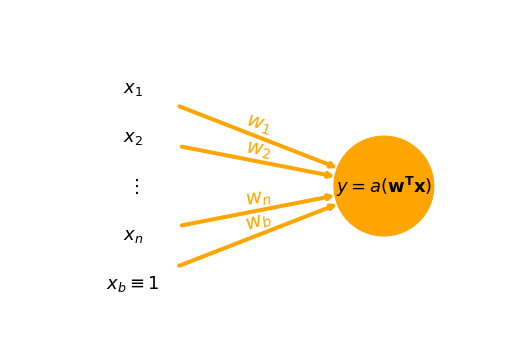

<IPython.core.display.Latex object>

In [384]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

input_neurons = [r'$x_1$', r'$x_2$', r'$\vdots$', r'$x_n$', r'$x_b \equiv1$']
output_neurons = [r'$y = a(\mathbf{w^T x})$']*len(input_neurons)

df = pd.DataFrame({'input_neurons': input_neurons,
                   'output_neurons': output_neurons})

scale = .3
pos = {input_neurons[0]: (1, 5*scale),
       input_neurons[1]: (1, 4*scale),
       input_neurons[2]: (1, 3*scale),
       input_neurons[3]: (1, 2*scale),
       input_neurons[4]: (1, 1*scale),
       output_neurons[0]: (3, 3*scale)}

labels = dict(zip(pos.keys(), pos.keys()))

G = nx.from_pandas_edgelist(df,
                            'input_neurons',
                            'output_neurons',
                            create_using=nx.DiGraph())

G = nx.restricted_view(G, [],  [(input_neurons[2],  output_neurons[0])])
nodes = nx.draw_networkx_nodes(G, pos,
                               nodelist=G.nodes,
                               node_size=1.e4,
                               node_shape='o',
                               node_color='orange',
                               alpha=[0, 1, 0, 0, 0, 0])

nx.draw_networkx_labels(G, pos, labels, font_size=18, font_color='black')

edges = nx.draw_networkx_edges(G, pos, node_size=1.e4,
                               arrowstyle='->',
                               edge_color='orange',
                               width=4,)

nx.draw_networkx_edge_labels(G, pos, bbox=dict(facecolor='none', edgecolor='none'),
                             font_size=20,
                             font_color='orange',
                             verticalalignment='bottom',
                             edge_labels={(input_neurons[0], output_neurons[0]): r'$w_1$',
                                          (input_neurons[1], output_neurons[1]): r'$w_2$',
                                          (input_neurons[2], output_neurons[2]): '',
                                          (input_neurons[3], output_neurons[3]): r'$w_n$',
                                          (input_neurons[4], output_neurons[4]): r'$w_b$'})

plt.xlim(0, 4)
plt.ylim(0, 2)
plt.axis('off')

plt.show()

Latex('''
Lets simplify by collecting all parameters in weight $\\mathbf{w}$ and rewriting weighted sum 
\\begin{align}
s &= \\frac{1}{||\\mathbf{w_{n}}||}\mathbf{w_{n}^T} \\mathbf{x'} - w_b' \\\ 
&\\sim \mathbf{w_{n}^T} \\mathbf{x'} - w_b \\\ 
&= \\begin{pmatrix} w_1 & w_2 & \ldots & w_n \\end{pmatrix} \\begin{pmatrix} x_1\\\ x_2 \\\ \\vdots \\\ x_n \\end{pmatrix} - w_b\\\ 
&= \\begin{pmatrix} w_1 & w_2 & \ldots & w_n & w_b \\end{pmatrix} \\begin{pmatrix} x_1\\\ x_2 \\\ \\vdots \\\ x_n \\\ 1 \\end{pmatrix}\\\ 
&= \mathbf{w^T} \\mathbf{x} 
\\end{align}
''')


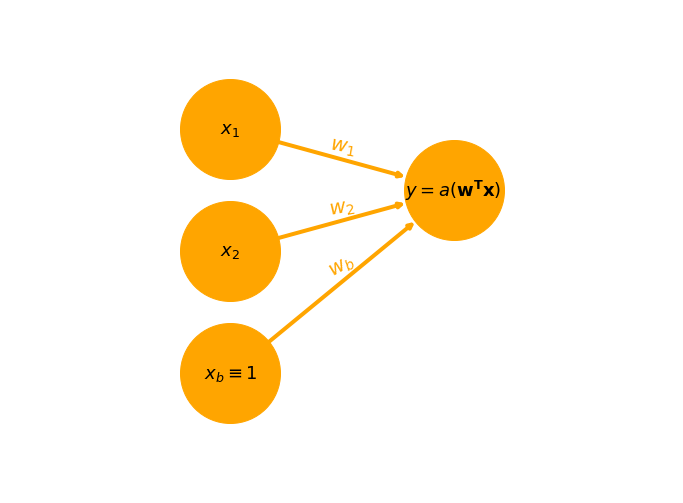

In [383]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

input_neurons = [r'$x_1$', r'$x_2$', r'$x_b \equiv1$']
output_neurons = [r'$y = a(\mathbf{w^T x})$']*len(input_neurons)

df = pd.DataFrame({'input_neurons': input_neurons,
                   'output_neurons': output_neurons})

pos = {input_neurons[0]: (1, 3),
       input_neurons[1]: (1, 2),
       input_neurons[2]: (1, 1),
       output_neurons[0]: (2, 2.5)}

labels = dict(zip(pos.keys(), pos.keys()))

G = nx.from_pandas_edgelist(df,
                            'input_neurons',
                            'output_neurons',
                            create_using=nx.DiGraph())

nodes = nx.draw_networkx_nodes(G, pos,
                               nodelist=G.nodes,
                               node_size=1.e4,
                               node_shape='o',
                               node_color='orange',
                               alpha=1.)
nx.draw_networkx_labels(G, pos, labels, font_size=18)

edges = nx.draw_networkx_edges(G, pos, node_size=1.e4,
                               arrowstyle='->',
                               edge_color='orange',
                               width=4)

nx.draw_networkx_edge_labels(G, pos, bbox=dict(facecolor='none', edgecolor='none'),
                             font_size=20,
                             font_color='orange',
                             verticalalignment='bottom',
                             edge_labels={(input_neurons[0], output_neurons[0]): r'$w_1$',
                                          (input_neurons[1], output_neurons[1]): r'$w_2$',
                                          (input_neurons[2], output_neurons[2]): r'$w_b$'})

plt.xlim(0, 3)
plt.ylim(0, 4)

plt.axis('off')
plt.show()



[ 0.5488135   0.71518937 -0.60276338]
[0 1]
[0 1 1]
0.1124259903007756


<ipython-input-388-27397e2962b4>:14: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  projected_sample_distance = np.asscalar(normal.T @ sample)


<IPython.core.display.Latex object>

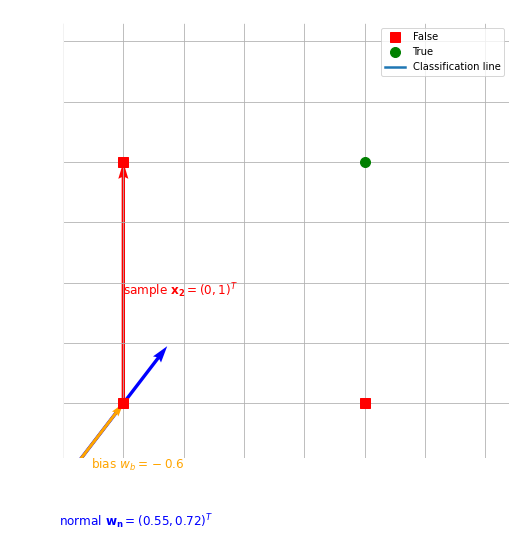

In [388]:
np.random.seed(0)
normal =  np.random.rand(2)
bias =  -np.random.rand(1)
weights = np.append(normal, bias)
print(weights)
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
plot_classification(weights)

sample_index = 2
sample = data[sample_index][0].astype(int)

plt.quiver(0, 0, sample[0], sample[1], color='r', angles='xy', scale_units='xy', scale=1)
projected_sample_distance = np.asscalar(normal.T @ sample)
projected_sample = projected_sample_distance * np.sqrt(2)* normal
plt.text(sample[0]/2, sample[1]/2-.05, r"sample $\mathbf{x_%s} = (%s, %s)^T$"%(sample_index, sample[0], sample[1]), color='red', fontsize=12)

#s_1 = weights.T * 
print(sample)
print(np.append(sample, 1))
print(sum(weights * np.append(sample, 1)))

Latex('''
How to choose weights? Could sample these random, e.g.  $\\mathbf{w} = \\begin{pmatrix} %s \\\ %s \\\ %s\\end{pmatrix}.$
This will incorrectly classify sample 

\\begin{align}
\\mathbf{x_1} &= \\begin{pmatrix} 1\\\ 0\\end{pmatrix} \\\ 
\\implies 
y_1 &= a\\left(\\underbrace{\\begin{pmatrix}%s & %s & %s\\end{pmatrix} \\begin{pmatrix} 1 \\\ 0 \\\ 1 \\end{pmatrix}}_{0.11}\\right) \\\ 
&= 1 
\\end{align} 
that is $true$, while its target $z_1 = false$.
'''%tuple(np.round(np.tile(weights, 2), 2)))


In [389]:
w = np.array([2, 2])
Latex('''
Let quantify what it means to be wrong, using e.g. squared error as a loss function

\\begin{equation}
    \\mathcal{L} =  \\left(y_i - z_i\\right)^2 %s %s %s %s
\\end{equation}
'''%tuple([w[:]]))

TypeError: not enough arguments for format string